In [201]:
# Golden points

# make a time series plot
# make a categorical plot with airline category

In [202]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 500)

In [203]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [204]:
# split train into train & val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['damaged'], random_state=42)

In [205]:
# The status_group column is the target
target = 'damaged'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [206]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_test = test[features]

In [207]:
X_train.head()

,id,incident_year,incident_month,incident_day,aircraft_model,aircraft_mass,engine_make,engines,engine1_position,engine2_position,engine4_position,height,speed,distance,aircraft_type,engine_model,engine_type,engine3_position,faa_region,flight_phase,visibility,precipitation,species_quantity,flight_impact
10271,27595,2007,10,5,29.0,4.0,22.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,A,7,D,NaN,NaN,NaN,NaN,NaN,1,NONE
2558,29466,2007,3,19,45.0,1.0,31.0,2.0,5.0,5.0,NaN,15.0,95.0,0.0,A,1,D,NaN,ANE,APPROACH,DAY,NONE,2-10,NONE
17984,12830,2003,8,1,25.0,2.0,7.0,2.0,4.0,4.0,NaN,300.0,90.0,NaN,A,31,A,NaN,ASO,APPROACH,DAY,NONE,1,NONE
12539,16532,2009,8,20,11.0,4.0,34.0,3.0,5.0,6.0,NaN,0.0,NaN,0.0,A,10,D,5,ASO,TAKEOFF RUN,DAWN,NaN,1,NONE
6981,23110,2009,2,17,NaN,4.0,22.0,2.0,1.0,1.0,NaN,2400.0,180.0,NaN,A,4,D,NaN,ASO,APPROACH,DAY,NONE,1,NONE


In [208]:
# what's the baseline?
train['damaged'].value_counts(normalize=True)

0    0.914345
1    0.085655
Name: damaged, dtype: float64

In [209]:
### EDA 
X_train.describe()

,id,incident_year,incident_month,incident_day,aircraft_model,aircraft_mass,engine_make,engines,engine1_position,engine2_position,engine4_position,height,speed,distance
count,16800.000000,16800.000000,16800.000000,16800.000000,11774.000000,12223.000000,11859.000000,12222.000000,12107.000000,11354.000000,279.000000,10049.000000,6930.000000,9684.000000
mean,15000.174286,2006.027857,7.204583,15.655238,24.700187,3.494478,21.218653,2.046392,2.994383,2.905672,2.028674,823.538661,141.304040,0.657004
std,8668.784618,6.741522,2.788599,8.792321,21.715365,0.889279,11.034415,0.462372,2.094371,2.001452,1.436636,1783.910471,53.566988,3.202573
min,2.000000,1990.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7497.750000,2001.000000,5.000000,8.000000,10.000000,3.000000,10.000000,2.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000
50%,14977.500000,2007.000000,8.000000,16.000000,23.000000,4.000000,22.000000,2.000000,1.000000,1.000000,1.000000,50.000000,137.000000,0.000000
75%,22476.500000,2012.000000,9.000000,23.000000,37.000000,4.000000,34.000000,2.000000,5.000000,5.000000,4.000000,800.000000,160.000000,0.000000
max,30000.000000,2015.000000,12.000000,31.000000,98.000000,5.000000,46.000000,4.000000,7.000000,6.000000,5.000000,24000.000000,2500.000000,60.000000


In [210]:
# list of variables with numerical values
num_vars = [var for var in X_train.columns if X_train[var].dtypes != 'O']

print("Num of numerical variables: ", len(num_vars))

X_train[num_vars].head()

Num of numerical variables:  14


,id,incident_year,incident_month,incident_day,aircraft_model,aircraft_mass,engine_make,engines,engine1_position,engine2_position,engine4_position,height,speed,distance
10271,27595,2007,10,5,29.0,4.0,22.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2558,29466,2007,3,19,45.0,1.0,31.0,2.0,5.0,5.0,NaN,15.0,95.0,0.0
17984,12830,2003,8,1,25.0,2.0,7.0,2.0,4.0,4.0,NaN,300.0,90.0,NaN
12539,16532,2009,8,20,11.0,4.0,34.0,3.0,5.0,6.0,NaN,0.0,NaN,0.0
6981,23110,2009,2,17,NaN,4.0,22.0,2.0,1.0,1.0,NaN,2400.0,180.0,NaN


In [211]:
# picked 20 as an arbitrary cutoff
discrete_vars = [var for var in num_vars if len(X_train[var].unique())<20]
print(f'Number of discrete variables: ', len(discrete_vars))

X_train[discrete_vars].head()

Number of discrete variables:  6


,incident_month,aircraft_mass,engines,engine1_position,engine2_position,engine4_position
10271,10,4.0,2.0,1.0,1.0,NaN
2558,3,1.0,2.0,5.0,5.0,NaN
17984,8,2.0,2.0,4.0,4.0,NaN
12539,8,4.0,3.0,5.0,6.0,NaN
6981,2,4.0,2.0,1.0,1.0,NaN


In [212]:
cont_vars = [var for var in num_vars if var not in discrete_vars]

print(f'Number of continous variables: ', len(cont_vars))

X_train[cont_vars].head()

Number of continous variables:  8


,id,incident_year,incident_day,aircraft_model,engine_make,height,speed,distance
10271,27595,2007,5,29.0,22.0,NaN,NaN,NaN
2558,29466,2007,19,45.0,31.0,15.0,95.0,0.0
17984,12830,2003,1,25.0,7.0,300.0,90.0,NaN
12539,16532,2009,20,11.0,34.0,0.0,NaN,0.0
6981,23110,2009,17,NaN,22.0,2400.0,180.0,NaN


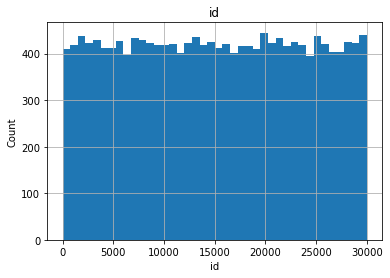

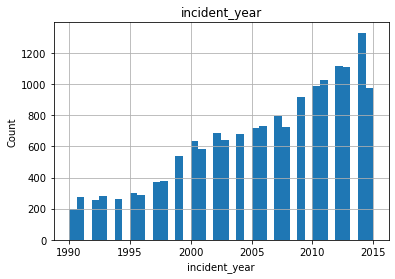

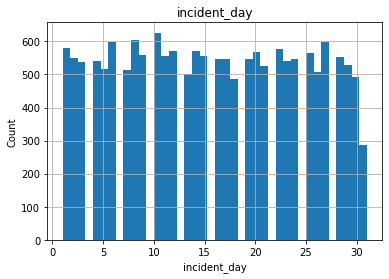

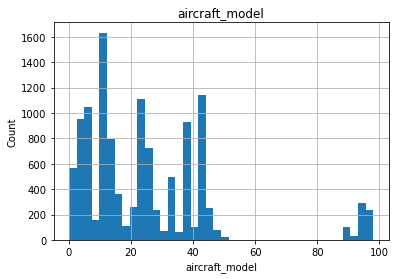

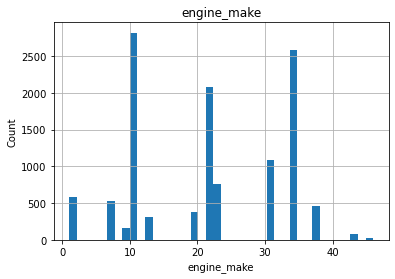

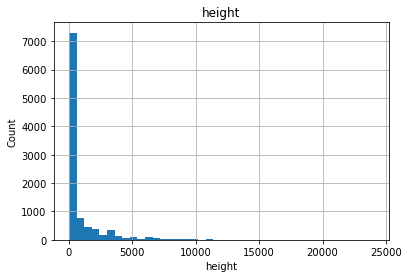

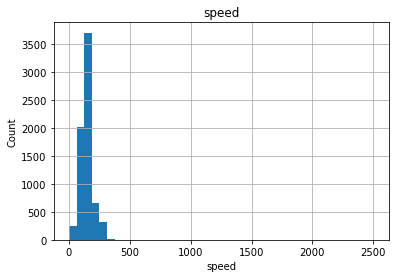

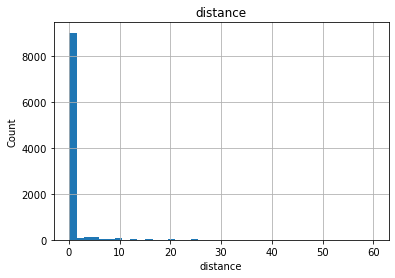

In [213]:
def hist_continuous_var(df, var):
    """
    Plots continuous variable.
    Histogram shows skew or normal dist. 
    """
    df = df.copy()
    
    df[var].hist(bins=40)
    plt.title(var)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.show()
    
for var in cont_vars:
    hist_continuous_var(X_train, var)

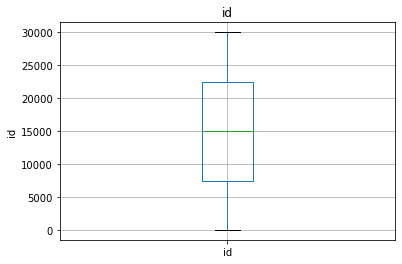

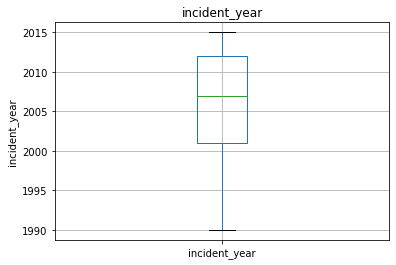

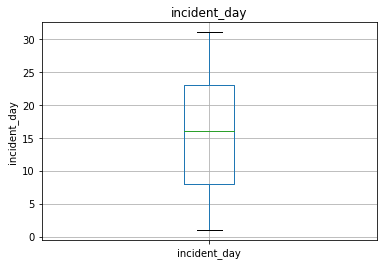

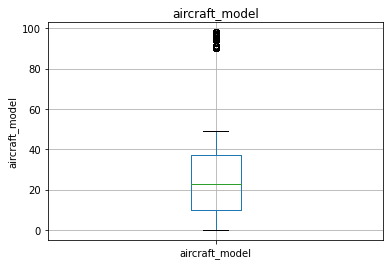

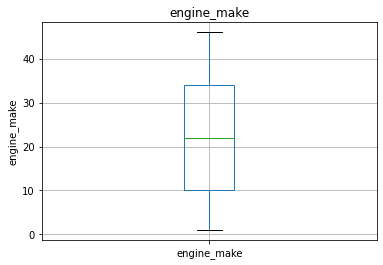

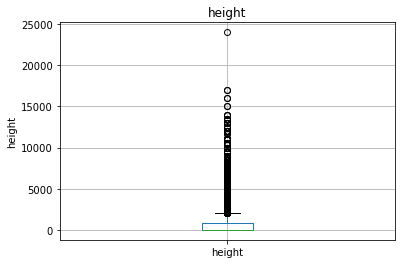

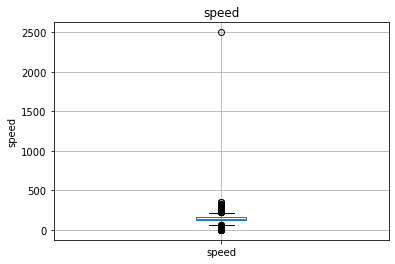

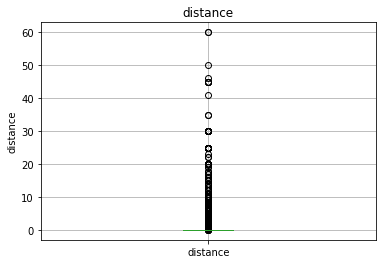

In [214]:
def plot_outliers(df, var):
    df = df.copy()
    
    # skip variables with negative values
    # if 0 in df[var].unique():
        # pass
    # else:
        #df[var] = np.log(df[var])    
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel(var)
    plt.show()

for var in cont_vars:
    plot_outliers(X_train, var)

In [215]:
# time var
time_vars = ['incident_year', 'incident_month', 'incident_day']

In [216]:
# list of variables with missing values
missing_vals = [var for var in train.columns if train[var].isnull().sum()>1]

for var in missing_vals:
    print(f'var, {np.round(train[var].isnull())} % missing values')

var, 10271    0.0
2558     0.0
17984    0.0
12539    0.0
6981     0.0
        ... 
18103    1.0
265      0.0
9450     1.0
1806     0.0
3143     0.0
Name: aircraft_type, Length: 16800, dtype: float16 % missing values
var, 10271    0.0
2558     0.0
17984    0.0
12539    0.0
6981     0.0
        ... 
18103    1.0
265      0.0
9450     1.0
1806     0.0
3143     0.0
Name: aircraft_make, Length: 16800, dtype: float16 % missing values
var, 10271    0.0
2558     0.0
17984    0.0
12539    0.0
6981     1.0
        ... 
18103    1.0
265      0.0
9450     1.0
1806     0.0
3143     0.0
Name: aircraft_model, Length: 16800, dtype: float16 % missing values
var, 10271    0.0
2558     0.0
17984    0.0
12539    0.0
6981     0.0
        ... 
18103    1.0
265      0.0
9450     1.0
1806     0.0
3143     0.0
Name: aircraft_mass, Length: 16800, dtype: float16 % missing values
var, 10271    0.0
2558     0.0
17984    0.0
12539    0.0
6981     0.0
        ... 
18103    1.0
265      0.0
9450     1.0
1806     0.0


In [217]:
### Model
import category_encoders as ce
import numpy as np
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.ensemble import RandomForestClassifier

In [228]:
# pipeline
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names='True'),
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                          min_samples_leaf = 1)
)

# parameter dictionary that lets us pass through various options to try
param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'], 
    #'randomforestclassifier__n_estimators': randint(50, 500), 
    #'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    #'randomforestclassifier__max_features': uniform(0, 1), 
}

# this implements a “fit” and a “score” method
# not all parameter values are tried out, but a fixed number of parameter settings
# is sampled from the specified distributions. 
# The number of parameter settings that are tried is given by n_iter.
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=3,  
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [229]:
search.fit(X_train, y_train);

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [230]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'simpleimputer__strategy': 'median'}
Cross-validation MAE -0.9202380952380952


In [231]:
# Make prediction
pipeline = search.best_estimator_

In [232]:
from sklearn.metrics import log_loss

# fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy: ', pipeline.score(X_val, y_val))

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Validation Accuracy:  0.9219047619047619


/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


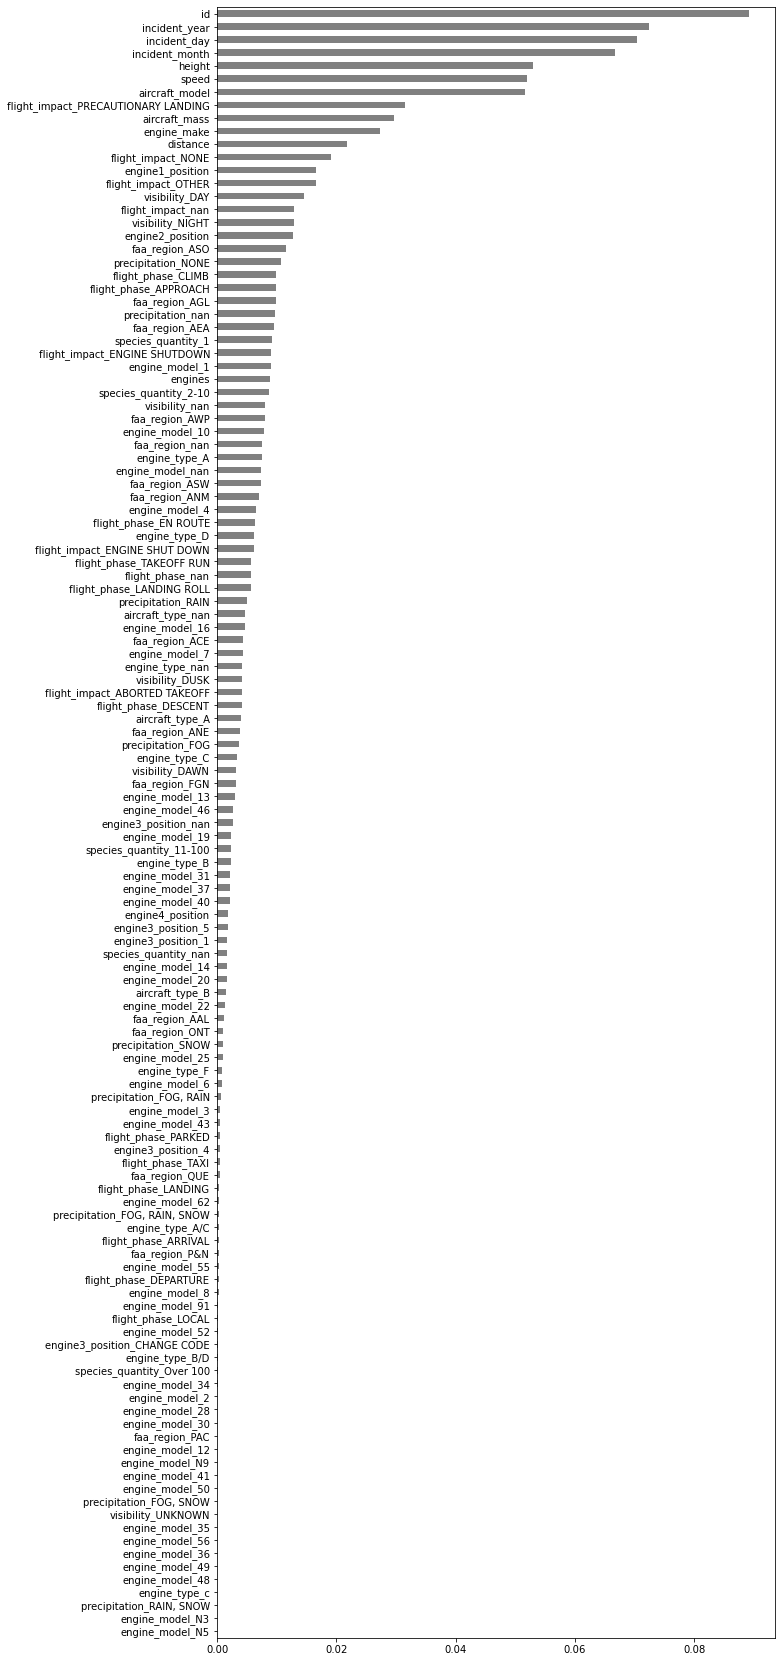

In [223]:
import matplotlib.pyplot as plt

# Get feature importances
model = pipeline.named_steps['randomforestclassifier']

# then input the encoded variable
# because we used one hot encoding, a little more steps
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

In [224]:
# this is a RandomForestClassifier

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [225]:
# this runs predict() on each feature

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)

feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0152 ± 0.0000,flight_impact
0.0033 ± 0.0000,flight_phase
0.0029 ± 0.0005,aircraft_mass
0.0026 ± 0.0019,incident_year
0.0021 ± 0.0029,height
0.0018 ± 0.0012,aircraft_model
0.0015 ± 0.0007,precipitation
0.0014 ± 0.0000,visibility
0.0011 ± 0.0002,engine_make
0.0008 ± 0.0007,aircraft_type


In [226]:
# remove features with 0 importance
minimum_importance = 0

# this returns an array of true/false
permuter.feature_importances_ > 0

# set a mask
mask = permuter.feature_importances_ > 0

# filter
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]

In [234]:
# rerun the pipeline

# Fit on train, score on test
pipeline.fit(X_train, y_train)

# apply permutation mask
X_test = X_test[features]

/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [235]:
# Test accuracy for submission
y_pred = pipeline.predict(X_test)

In [236]:
# Create a  DataFrame with the ids and our prediction 
submission = pd.DataFrame({'id':test['id'], 'damaged':y_pred})
submission.head()

,id,damaged
0,11254,0
1,27716,0
2,29066,0
3,3373,0
4,1996,0


In [237]:
# Convert DataFrame to a csv file that can be uploaded
# This is saved in the same directory as your notebook
filename = 'predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: predictions.csv
